In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from hperf_forecasting.data import fill_missing_time, mk_univariate
from sklearn.model_selection import train_test_split
import hperf_forecasting as hpf

import pandas as pd
import numpy as np
import arch.unitroot as unitroot

df = pd.read_csv("tests/data/cpu_utilization.csv")
# df["ts"] = df["ts"] / 20
df["ts"] = pd.to_datetime(df["ts"], unit="s")
df["%cpu"] = df["%cpu"]
df = df.dropna()
df

,ts,%cpu
0,1970-01-01 00:00:00,68.08
1,1970-01-01 00:00:20,57.91
2,1970-01-01 00:00:40,62.14
3,1970-01-01 00:01:00,71.44
4,1970-01-01 00:01:20,68.61
...,...,...
1435,1970-01-01 07:58:20,62.16
1436,1970-01-01 07:58:40,61.17
1437,1970-01-01 07:59:00,46.23
1438,1970-01-01 07:59:20,58.10


In [83]:
from hperf_forecasting.predictor import (
    ArimaPredictor,
    ProphetPredictor,
    AutoTsPredictor,
    EwmPredictor,
)

import hperf_forecasting as hpf
from sklearn.metrics import mean_absolute_percentage_error
from hperf_forecasting.data import fill_missing_time, mk_univariate
from sklearn.model_selection import train_test_split
import hperf_forecasting as hpf


def eval_ts(path: str):
    df = pd.read_csv(path)
    df["ts"] = pd.to_datetime(df["ts"], unit="s")
    df = df.dropna()

    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)
    format = mk_univariate("%cpu", "ts", freq="20s")
    ds = hpf.Dataset(train_df, format)

    model1 = AutoTsPredictor(ds)
    model1.fit(predict_len=len(test_df))

    y1 = model1.predict()

    model2 = ArimaPredictor(ds)
    model2.fit()

    y2 = model2.predict(predict_len=len(test_df))

    model3 = ProphetPredictor(ds)
    model3.fit()

    y3 = model3.predict(predict_len=len(test_df))

    model4 = EwmPredictor(ds)
    model4.fit()

    y4 = model4.predict(predict_len=len(test_df))

    errors = {
        "auto_ts": mean_absolute_percentage_error(test_df["%cpu"], y1["%cpu"]),
        "arima": mean_absolute_percentage_error(test_df["%cpu"], y2["%cpu"]),
        "prophet": mean_absolute_percentage_error(test_df["%cpu"], y3["%cpu"]),
        "ewm": mean_absolute_percentage_error(test_df["%cpu"], y4["%cpu"]),
    }

    return errors


e1 = eval_ts("tests/data/cpu_utilization_s1.csv")
e2 = eval_ts("tests/data/cpu_utilization_s2.csv")
e3 = eval_ts("tests/data/cpu_utilization_s3.csv")

Using 16 cpus for n_jobs.
Data frequency is: 20s, used frequency is: 20s
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model GLS in generation 0 of 3
Model Number: 5 with model GLS in generation 0 of 3
Model Number: 6 with model LastValueNaive in generation 0 of 3
Model Number: 7 with model LastValueNaive in generation 0 of 3
Model Number: 8 with model LastValueNaive in generation 0 of 3
Model Number: 9 with model LastValueNaive in generation 0 of 3
Model Number: 10 with model SeasonalNaive in generation 0 of 3
Model Number: 11 with model SeasonalNaive in generation 0 of 3
Model Number: 12 with model SeasonalNaive in generation 0 of 3
Model Number: 13 with model ConstantNaive in generation 0 of 3
Model Number: 14 with model SeasonalNaive in generation 0 of 3
Model Number: 15 with model SectionalMotif in generation 0

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 23 with model SeasonalNaive in generation 0 of 3
Model Number: 24 with model SeasonalityMotif in generation 0 of 3
prediction too long for indepedent=False, falling back on indepdent=True
Model Number: 25 with model SectionalMotif in generation 0 of 3
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 25 in generation 0: SectionalMotif
Model Number: 26 with model SectionalMotif in generation 0 of 3
Model Number: 27 with model SeasonalityMotif in generation 0 of 3
Model Number: 28 with model GLS in generation 0 of 3
Model Number: 29 with model SectionalMotif in generation 0 of 3
Model Number: 30 with model LastValueNaive in generation 0 of 3
Model Number: 31 with model GLS in generation 0 of 3
Model Number: 32 with model AverageValueNaive in generation 0 of 3
Model Number: 33 with model AverageValueNaive in generation 0 of 3
Model Number: 34 with model GLS in generation 0 of 3
Model Number: 35 with model ConstantNaive in generation 0 of 3
Model 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 114 with model SeasonalNaive in generation 2 of 3
Model Number: 115 with model LastValueNaive in generation 2 of 3
Model Number: 116 with model SeasonalityMotif in generation 2 of 3
Model Number: 117 with model LastValueNaive in generation 2 of 3
Model Number: 118 with model SectionalMotif in generation 2 of 3
Model Number: 119 with model LastValueNaive in generation 2 of 3
Model Number: 120 with model SectionalMotif in generation 2 of 3
Model Number: 121 with model GLS in generation 2 of 3
Model Number: 122 with model ConstantNaive in generation 2 of 3
Model Number: 123 with model SeasonalNaive in generation 2 of 3
New Generation: 3 of 3
Model Number: 124 with model SeasonalNaive in generation 3 of 3
Model Number: 125 with model LastValueNaive in generation 3 of 3
Model Number: 126 with model SeasonalNaive in generation 3 of 3
Model Number: 127 with model SeasonalNaive in generation 3 of 3
Model Number: 128 with model SeasonalNaive in generation 3 of 3
Model Number: 129 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
18

100%|██████████| 100/100 [00:00<00:00, 190.84trial/s, best loss: 51.406804793866534]
Using 16 cpus for n_jobs.
Data frequency is: 20s, used frequency is: 20s
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model GLS in generation 0 of 3
Model Number: 5 with model GLS in generation 0 of 3
Model Number: 6 with model LastValueNaive in generation 0 of 3
Model Number: 7 with model LastValueNaive in generation 0 of 3
Model Number: 8 with model LastValueNaive in generation 0 of 3
Model Number: 9 with model LastValueNaive in generation 0 of 3
Model Number: 10 with model SeasonalNaive in generation 0 of 3
Model Number: 11 with model SeasonalNaive in generation 0 of 3
Model Number: 12 with model SeasonalNaive in generation 0 of 3
Model Number: 13 with model ConstantNaive in generation 0 of 3
Model Number: 14 with model Seasonal

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 23 with model SeasonalNaive in generation 0 of 3
Model Number: 24 with model SeasonalityMotif in generation 0 of 3
prediction too long for indepedent=False, falling back on indepdent=True
Model Number: 25 with model SectionalMotif in generation 0 of 3
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 25 in generation 0: SectionalMotif
Model Number: 26 with model SectionalMotif in generation 0 of 3
Model Number: 27 with model SeasonalityMotif in generation 0 of 3
Model Number: 28 with model GLS in generation 0 of 3
Model Number: 29 with model SectionalMotif in generation 0 of 3
Model Number: 30 with model LastValueNaive in generation 0 of 3
Model Number: 31 with model GLS in generation 0 of 3
Model Number: 32 with model AverageValueNaive in generation 0 of 3
Model Number: 33 with model AverageValueNaive in generation 0 of 3
Model Number: 34 with model GLS in generation 0 of 3
Model Number: 35 with model ConstantNaive in generation 0 of 3
Model 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 148 with model GLS in generation 3 of 3
Model Number: 149 with model AverageValueNaive in generation 3 of 3
Model Number: 150 with model SeasonalityMotif in generation 3 of 3
Model Number: 151 with model LastValueNaive in generation 3 of 3
Model Number: 152 with model SeasonalityMotif in generation 3 of 3
Model Number: 153 with model SectionalMotif in generation 3 of 3
Model Number: 154 with model GLS in generation 3 of 3
Model Number: 155 with model SeasonalityMotif in generation 3 of 3
Model Number: 156 with model SectionalMotif in generation 3 of 3
Model Number: 157 with model LastValueNaive in generation 3 of 3
Model Number: 158 with model AverageValueNaive in generation 3 of 3
Validation Round: 1
Model Number: 1 of 24 with model SectionalMotif for Validation 1
📈 1 - SectionalMotif with avg smape 81.1: 
Model Number: 2 of 24 with model SectionalMotif for Validation 1
📈 2 - SectionalMotif with avg smape 80.58: 
Model Number: 3 of 24 with model SectionalMotif for Valida

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
18

100%|██████████| 100/100 [00:00<00:00, 191.59trial/s, best loss: 43.13150933186589]
Using 16 cpus for n_jobs.
Data frequency is: 20s, used frequency is: 20s
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model GLS in generation 0 of 3
Model Number: 5 with model GLS in generation 0 of 3
Model Number: 6 with model LastValueNaive in generation 0 of 3
Model Number: 7 with model LastValueNaive in generation 0 of 3
Model Number: 8 with model LastValueNaive in generation 0 of 3
Model Number: 9 with model LastValueNaive in generation 0 of 3
Model Number: 10 with model SeasonalNaive in generation 0 of 3
Model Number: 11 with model SeasonalNaive in generation 0 of 3
Model Number: 12 with model SeasonalNaive in generation 0 of 3
Model Number: 13 with model ConstantNaive in generation 0 of 3
Model Number: 14 with model SeasonalN

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 23 with model SeasonalNaive in generation 0 of 3
Model Number: 24 with model SeasonalityMotif in generation 0 of 3
prediction too long for indepedent=False, falling back on indepdent=True
Model Number: 25 with model SectionalMotif in generation 0 of 3
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 25 in generation 0: SectionalMotif
Model Number: 26 with model SectionalMotif in generation 0 of 3
Model Number: 27 with model SeasonalityMotif in generation 0 of 3
Model Number: 28 with model GLS in generation 0 of 3
Model Number: 29 with model SectionalMotif in generation 0 of 3
Model Number: 30 with model LastValueNaive in generation 0 of 3
Model Number: 31 with model GLS in generation 0 of 3
Model Number: 32 with model AverageValueNaive in generation 0 of 3
Model Number: 33 with model AverageValueNaive in generation 0 of 3
Model Number: 34 with model GLS in generation 0 of 3
Model Number: 35 with model ConstantNaive in generation 0 of 3
Model 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 63 with model LastValueNaive in generation 1 of 3
Model Number: 64 with model ConstantNaive in generation 1 of 3
Model Number: 65 with model SeasonalNaive in generation 1 of 3
Model Number: 66 with model SeasonalNaive in generation 1 of 3
Model Number: 67 with model LastValueNaive in generation 1 of 3
Model Number: 68 with model SeasonalNaive in generation 1 of 3
Model Number: 69 with model SectionalMotif in generation 1 of 3
Model Number: 70 with model LastValueNaive in generation 1 of 3
Model Number: 71 with model LastValueNaive in generation 1 of 3
Model Number: 72 with model SeasonalNaive in generation 1 of 3
Model Number: 73 with model GLS in generation 1 of 3
Model Number: 74 with model SectionalMotif in generation 1 of 3
Model Number: 75 with model SectionalMotif in generation 1 of 3
Model Number: 76 with model LastValueNaive in generation 1 of 3
Model Number: 77 with model ConstantNaive in generation 1 of 3
Model Number: 78 with model GLS in generation 1 of 3
Mode

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 81 with model ConstantNaive in generation 1 of 3
Model Number: 82 with model GLS in generation 1 of 3
Model Number: 83 with model AverageValueNaive in generation 1 of 3
Model Number: 84 with model GLS in generation 1 of 3
Model Number: 85 with model SeasonalityMotif in generation 1 of 3
Model Number: 86 with model SeasonalNaive in generation 1 of 3
Model Number: 87 with model LastValueNaive in generation 1 of 3
Model Number: 88 with model GLS in generation 1 of 3
New Generation: 2 of 3
Model Number: 89 with model AverageValueNaive in generation 2 of 3
Model Number: 90 with model GLS in generation 2 of 3
Model Number: 91 with model LastValueNaive in generation 2 of 3
Model Number: 92 with model SectionalMotif in generation 2 of 3
Model Number: 93 with model SeasonalNaive in generation 2 of 3
Model Number: 94 with model SectionalMotif in generation 2 of 3
Model Number: 95 with model GLS in generation 2 of 3
Model Number: 96 with model GLS in generation 2 of 3
Model Number: 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 120 with model GLS in generation 2 of 3
Model Number: 121 with model SeasonalNaive in generation 2 of 3
Model Number: 122 with model AverageValueNaive in generation 2 of 3
Model Number: 123 with model AverageValueNaive in generation 2 of 3
New Generation: 3 of 3
Model Number: 124 with model SectionalMotif in generation 3 of 3
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 124 in generation 3: SectionalMotif
Model Number: 125 with model GLS in generation 3 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 126 with model SectionalMotif in generation 3 of 3
Model Number: 127 with model SeasonalNaive in generation 3 of 3
Model Number: 128 with model LastValueNaive in generation 3 of 3
Model Number: 129 with model LastValueNaive in generation 3 of 3
Model Number: 130 with model SectionalMotif in generation 3 of 3
Model Number: 131 with model SeasonalNaive in generation 3 of 3
Model Number: 132 with model SeasonalityMotif in generation 3 of 3
Model Number: 133 with model SeasonalNaive in generation 3 of 3
Model Number: 134 with model SectionalMotif in generation 3 of 3
Model Number: 135 with model ConstantNaive in generation 3 of 3
Model Number: 136 with model SeasonalNaive in generation 3 of 3
Model Number: 137 with model AverageValueNaive in generation 3 of 3
Model Number: 138 with model AverageValueNaive in generation 3 of 3
Model Number: 139 with model GLS in generation 3 of 3
Model Number: 140 with model GLS in generation 3 of 3
Model Number: 141 with model SeasonalNaive i

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
18

100%|██████████| 100/100 [00:00<00:00, 188.67trial/s, best loss: 24.438328158170794]


In [87]:
error_df = pd.DataFrame([e1, e2, e3])
error_df.to_csv("tests/data/error.csv", float_format="%.4f")

In [24]:
from hperf_forecasting.predictor import (
    ArimaPredictor,
    ProphetPredictor,
    AutoTsPredictor,
    EwmPredictor,
)


train_df, test_df = train_test_split(df, test_size=0.1, shuffle=False)

format = mk_univariate("%cpu", "ts", freq="20s")
# df = fill_missing_time(df, format)

ds = hpf.Dataset(train_df, format)

model = AutoTsPredictor(ds)
model.fit(predict_len=len(test_df))

auto_ts_y = model.predict()
auto_ts_y

Using 16 cpus for n_jobs.
Data frequency is: 20s, used frequency is: 20s
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model DatepartRegression in generation 0 of 3
Model Number: 5 with model DatepartRegression in generation 0 of 3
Model Number: 6 with model DatepartRegression in generation 0 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 3
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 3
Model Number: 9 with model ETS in generation 0 of 3
Model Number: 10 with model GLM in generation 0 of 3
Model Number: 11 with model GLM in generation 0 of 3
Model Number: 12 with model GLS in generation 0 of 3
Model Number: 13 with model GLS in generation 0 of 3
Model Number: 14 with model LastValueNaive in generation 0 of 3
Model Number: 15 with model LastValueNaive in generation 0 of 3
Model Number: 16 with model LastValueNaive in generation 0 of 3
Model Number: 17 with model LastValueNaive in generation 0 of 3
Model Number: 18 with model SeasonalNaive in generation 0 of 3
Model Number: 19 with model SeasonalNaive in generation 0 of 3
Model Number: 20 with model SeasonalNaive in generation 0 of 3
Model Number: 21 with mode

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 27 with model DatepartRegression in generation 0 of 3
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 3
Model Number: 29 with model DatepartRegression in generation 0 of 3
Model Number: 30 with model ETS in generation 0 of 3
Model Number: 31 with model VECM in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Model Number: 32 with model UnivariateMotif in generation 0 of 3
Model Number: 33 with model UnivariateMotif in generation 0 of 3
Model Number: 34 with model SectionalMotif in generation 0 of 3
Model Number: 35 with model SectionalMotif in generation 0 of 3
Model Number: 36 with model SeasonalNaive in generation 0 of 3
Model Number: 37 with model DatepartRegression in generation 0 of 3
Model Number: 38 with model NVAR in generation 0 of 3
Model Number: 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 48 with model SeasonalNaive in generation 0 of 3
Model Number: 49 with model GLM in generation 0 of 3
Model Number: 50 with model ETS in generation 0 of 3
Model Number: 51 with model VAR in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VAR') in model 51 in generation 0: VAR
Model Number: 52 with model VECM in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VECM') in model 52 in generation 0: VECM
Model Number: 53 with model WindowRegression in generation 0 of 3
Template Eval Error: Exception("Transformer STLFilter failed on fit from params cubic {'0': {'lag': 7, 'fill': 'bfill'}, '1': {}, '2': {'rows': None, 'displacement_rows': 2, 'quantile': 1.0, 'decay_span': 90}, '3': {'method': 0.5}, '4': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}, '5': {'model_name': 'local_linear_trend_ets_aan', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[0.7, 0.0], [0.0, 1.1]], 'observation_model': [[1, 0]], 'obse

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeW

Model Number: 65 with model BallTreeMultivariateMotif in generation 0 of 3
Template Eval Error: ValueError('negative dimensions are not allowed') in model 65 in generation 0: BallTreeMultivariateMotif
Model Number: 66 with model UnivariateMotif in generation 0 of 3
Model Number: 67 with model UnivariateMotif in generation 0 of 3
Model Number: 68 with model AverageValueNaive in generation 0 of 3
Model Number: 69 with model MetricMotif in generation 0 of 3
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '1': {}, '2': {'method': 0.2}, '3': {'output_distribution': 'uniform', 'n_quantiles': 20}}") in model 69 in generation 0: MetricMotif
Model Number: 70 with model UnivariateMotif in generation 0 of 3
Model Number: 71 with model VAR in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VAR') in model 71 in gen

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4586e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 102 with model DatepartRegression in generation 0 of 3
Model Number: 103 with model SeasonalNaive in generation 0 of 3
Model Number: 104 with model ETS in generation 0 of 3
Model Number: 105 with model ETS in generation 0 of 3
Model Number: 106 with model NVAR in generation 0 of 3
Model Number: 107 with model MetricMotif in generation 0 of 3
Model Number: 108 with model AverageValueNaive in generation 0 of 3
Model Number: 109 with model GLM in generation 0 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 110 with model UnivariateMotif in generation 0 of 3
Model Number: 111 with model SeasonalityMotif in generation 0 of 3
Model Number: 112 with model AverageValueNaive in generation 0 of 3
Model Number: 113 with model SeasonalityMotif in generation 0 of 3
Model Number: 114 with model WindowRegression in generation 0 of 3
Model Number: 115 with model LastValueNaive in generation 0 of 3
Model Number: 116 with model MetricMotif in generation 0 of 3
Template Eval Error: ValueError('Shape of passed values is (144, 2), indices imply (144, 1)') in model 116 in generation 0: MetricMotif
Model Number: 117 with model UnivariateMotif in generation 0 of 3
Model Number: 118 with model SeasonalityMotif in generation 0 of 3
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params piecewise_polynomial {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': True, 'threshold': None}}") in model 118 in generation 0: SeasonalityMot

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Template Eval Error: ValueError('Shape of passed values is (42, 1), indices imply (144, 1)') in model 127 in generation 0: MAR
Model Number: 128 with model GLM in generation 0 of 3
Model Number: 129 with model ConstantNaive in generation 0 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 130 with model ConstantNaive in generation 0 of 3
Model Number: 131 with model SectionalMotif in generation 0 of 3
Model Number: 132 with model SectionalMotif in generation 0 of 3
Model Number: 133 with model GLS in generation 0 of 3
Model Number: 134 with model SectionalMotif in generation 0 of 3
Model Number: 135 with model AverageValueNaive in generation 0 of 3
Model Number: 136 with model LastValueNaive in generation 0 of 3
Model Number: 137 with model SeasonalityMotif in generation 0 of 3
Model Number: 138 with model KalmanStateSpace in generation 0 of 3
Model Number: 139 with model ETS in generation 0 of 3
Model Number: 140 with model ConstantNaive in generation 0 of 3
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': 10, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'firs

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversio

Model Number: 143 with model VAR in generation 0 of 3
Template Eval Error: ValueError('Only gave one variable to VAR') in model 143 in generation 0: VAR
Model Number: 144 with model SectionalMotif in generation 0 of 3
Model Number: 145 with model SectionalMotif in generation 0 of 3
Model Number: 146 with model UnivariateMotif in generation 0 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 147 with model SectionalMotif in generation 0 of 3
Model Number: 148 with model MAR in generation 0 of 3
Model Number: 149 with model MAR in generation 0 of 3
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag_1': 7, 'method': 'Median'}, '1': {'fixed': False, 'window': 90, 'macro_micro': False, 'center': True}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '3': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '4': {}}") in model 149 in generation 0: MAR
Model Number: 150 with model SeasonalNaive in generation 0 of 3
Model Number: 151 with model SeasonalNaive in generation 0 of 3
Model Number: 152 with model KalmanStateSpace in generation 0 of 3
Model Number: 153 with model RRVAR in generation 0 of 3
New Generation: 1 of 3
Model Number: 154 with model SeasonalNaive in generation 1 of 3
Model Number: 155 with model DatepartRegression in generation

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 171 with model ETS in generation 1 of 3
Model Number: 172 with model WindowRegression in generation 1 of 3
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 172 in generation 1: WindowRegression
Model Number: 173 with model SeasonalNaive in generation 1 of 3
Model Number: 174 with model GLM in generation 1 of 3
Model Number: 175 with model SectionalMotif in generation 1 of 3
Model Number: 176 with model FFT in generation 1 of 3
Model Number: 177 with model AverageValueNaive in generation 1 of 3
Model Number: 178 with model GLS in generation 1 of 3
Model Number: 179 with model SeasonalNaive in generation 1 of 3
Model Number: 180 with model ConstantNaive in generation 1 of 3
Model Number: 181 with model AverageValueNaive in generation 1 of 3
Model Number: 182 with model GLS in generation 1 of 3
Model Number: 183 with model LastValueNaive in generation 1 of 3
Model Number: 184 with model AverageValueNaive in generation 1 of 3
Model Number: 185 w

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 191 with model SeasonalityMotif in generation 1 of 3
Model Number: 192 with model UnivariateMotif in generation 1 of 3
Model Number: 193 with model ETS in generation 1 of 3
Model Number: 194 with model ETS in generation 1 of 3
Model Number: 195 with model DatepartRegression in generation 1 of 3
Model Number: 196 with model WindowRegression in generation 1 of 3
Model Number: 197 with model GLM in generation 1 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:13

Model Number: 198 with model SectionalMotif in generation 1 of 3
Model Number: 199 with model SeasonalNaive in generation 1 of 3
Model Number: 200 with model LastValueNaive in generation 1 of 3
Model Number: 201 with model MetricMotif in generation 1 of 3
Model Number: 202 with model SeasonalityMotif in generation 1 of 3
Model Number: 203 with model WindowRegression in generation 1 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 204 with model DatepartRegression in generation 1 of 3
Model Number: 205 with model SeasonalNaive in generation 1 of 3
Model Number: 206 with model UnivariateMotif in generation 1 of 3
Model Number: 207 with model UnivariateMotif in generation 1 of 3
Model Number: 208 with model AverageValueNaive in generation 1 of 3
Model Number: 209 with model AverageValueNaive in generation 1 of 3
Model Number: 210 with model SeasonalityMotif in generation 1 of 3
Model Number: 211 with model MetricMotif in generation 1 of 3
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'method': 'clip', 'std_threshold': 2, 'fillna': None}}") in model 211 in generation 1: MetricMotif
Model Number: 212 with model SeasonalNaive in generation 1 of 3
Model Number: 213 with model DatepartRegression in generation 1 of 3
Model Number: 214 with model LastValueNaive in generation 1 of 3
Model Number: 215 w

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4586e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 233 with model MetricMotif in generation 1 of 3
Model Number: 234 with model SectionalMotif in generation 1 of 3
Model Number: 235 with model RRVAR in generation 1 of 3
Model Number: 236 with model SeasonalityMotif in generation 1 of 3
Model Number: 237 with model DatepartRegression in generation 1 of 3
Model Number: 238 with model SectionalMotif in generation 1 of 3
Model Number: 239 with model AverageValueNaive in generation 1 of 3
Model Number: 240 with model ConstantNaive in generation 1 of 3
Model Number: 241 with model NVAR in generation 1 of 3
Model Number: 242 with model DatepartRegression in generation 1 of 3
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 242 in generation 1: DatepartRegression
Model Number: 243 with model DatepartRegression in generation 1 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:1548: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = (df + 1).replace([0], np.nan)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:1548: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = (df + 1).replace([0], np.nan)


Model Number: 244 with model ConstantNaive in generation 1 of 3
Model Number: 245 with model SeasonalityMotif in generation 1 of 3
Model Number: 246 with model SeasonalNaive in generation 1 of 3
Model Number: 247 with model DatepartRegression in generation 1 of 3
Model Number: 248 with model UnivariateMotif in generation 1 of 3
Model Number: 249 with model LastValueNaive in generation 1 of 3
Model Number: 250 with model MAR in generation 1 of 3
Model Number: 251 with model SectionalMotif in generation 1 of 3
Model Number: 252 with model SeasonalNaive in generation 1 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 253 with model GLM in generation 1 of 3
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 253 in generation 1: GLM
Model Number: 254 with model GLM in generation 1 of 3
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 254 in generation 1: GLM
Model Number: 255 with model ConstantNaive in generation 1 of 3
Model Number: 256 with model GLM in generation 1 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 257 with model MAR in generation 1 of 3
Model Number: 258 with model SeasonalityMotif in generation 1 of 3
Model Number: 259 with model ETS in generation 1 of 3
Model Number: 260 with model GLM in generation 1 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 261 with model SectionalMotif in generation 1 of 3
Model Number: 262 with model MetricMotif in generation 1 of 3
Model Number: 263 with model LastValueNaive in generation 1 of 3
New Generation: 2 of 3
Model Number: 264 with model WindowRegression in generation 2 of 3
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 264 in generation 2: WindowRegression
Model Number: 265 with model DatepartRegression in generation 2 of 3
Model Number: 266 with model NVAR in generation 2 of 3
Model Number: 267 with model AverageValueNaive in generation 2 of 3
Model Number: 268 with model ConstantNaive in generation 2 of 3
Model Number: 269 with model SeasonalNaive in generation 2 of 3
Model Number: 270 with model ETS in generation 2 of 3
Model Number: 271 with model GLS in generation 2 of 3
Model Number: 272 with model GLM in generation 2 of 3
Model Number: 273 with model SeasonalNaive in generation 2 of 3
Model Number: 274 with model GLS in generation 2 of 3
M

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 282 with model SectionalMotif in generation 2 of 3
Model Number: 283 with model SectionalMotif in generation 2 of 3
Model Number: 284 with model RRVAR in generation 2 of 3
Model Number: 285 with model SeasonalityMotif in generation 2 of 3
Model Number: 286 with model ETS in generation 2 of 3
Model Number: 287 with model LastValueNaive in generation 2 of 3
Model Number: 288 with model AverageValueNaive in generation 2 of 3
Model Number: 289 with model UnivariateMotif in generation 2 of 3
Model Number: 290 with model AverageValueNaive in generation 2 of 3
Model Number: 291 with model ETS in generation 2 of 3
Model Number: 292 with model WindowRegression in generation 2 of 3
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 292 in generation 2: WindowRegression
Model Number: 293 with model UnivariateMotif in generation 2 of 3
Model Number: 294 with model LastValueNaive in generation 2 of 3
Model Number: 295 with model GLS in generation 2 of 3
Mod

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 309 with model WindowRegression in generation 2 of 3
Model Number: 310 with model UnivariateMotif in generation 2 of 3
Template Eval Error: Exception("Transformer STLFilter failed on fit from params time {'0': {}, '1': {'decomp_type': 'seasonal_decompose', 'part': 'seasonal'}}") in model 310 in generation 2: UnivariateMotif
Model Number: 311 with model SeasonalNaive in generation 2 of 3
Model Number: 312 with model WindowRegression in generation 2 of 3
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 312 in generation 2: WindowRegression
Model Number: 313 with model ETS in generation 2 of 3
Model Number: 314 with model KalmanStateSpace in generation 2 of 3
Model Number: 315 with model SeasonalityMotif in generation 2 of 3
Model Number: 316 with model WindowRegression in generation 2 of 3
Model Number: 317 with model ETS in generation 2 of 3
Model Number: 318 with model GLM in generation 2 of 3
Template Eval Error: ValueError('The first guess

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)

Model Number: 321 with model WindowRegression in generation 2 of 3
Model Number: 322 with model LastValueNaive in generation 2 of 3
Model Number: 323 with model LastValueNaive in generation 2 of 3
Model Number: 324 with model GLM in generation 2 of 3
Model Number: 325 with model SeasonalityMotif in generation 2 of 3
Model Number: 326 with model DatepartRegression in generation 2 of 3
Model Number: 327 with model UnivariateMotif in generation 2 of 3
Model Number: 328 with model SeasonalNaive in generation 2 of 3
Model Number: 329 with model MetricMotif in generation 2 of 3
Model Number: 330 with model SeasonalNaive in generation 2 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 331 with model LastValueNaive in generation 2 of 3
Model Number: 332 with model UnivariateMotif in generation 2 of 3
Model Number: 333 with model LastValueNaive in generation 2 of 3
Model Number: 334 with model ETS in generation 2 of 3
Model Number: 335 with model DatepartRegression in generation 2 of 3
Model Number: 336 with model ETS in generation 2 of 3
Model Number: 337 with model GLS in generation 2 of 3
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'lag_1': 12, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': None}, '3': {'threshold': 0.9, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 345 with model FFT in generation 2 of 3
Model Number: 346 with model ETS in generation 2 of 3
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill {'0': {'decomp_type': 'STL', 'part': 'seasonal', 'seasonal': 7}, '1': {'model': 'Linear', 'phi': 0.999, 'window': None, 'transform_dict': None}, '2': {}, '3': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}, '4': {}}") in model 346 in generation 2: ETS
Model Number: 347 with model ETS in generation 2 of 3
Model Number: 348 with model UnivariateMotif in generation 2 of 3
Model Number: 349 with model MetricMotif in generation 2 of 3
Model Number: 350 with model SeasonalNaive in generation 2 of 3
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params zero {'0': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': False, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lu

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 353 with model WindowRegression in generation 2 of 3
Model Number: 354 with model ETS in generation 2 of 3
Model Number: 355 with model SeasonalityMotif in generation 2 of 3
Model Number: 356 with model AverageValueNaive in generation 2 of 3
Model Number: 357 with model MetricMotif in generation 2 of 3
Model Number: 358 with model UnivariateMotif in generation 2 of 3
Model Number: 359 with model MetricMotif in generation 2 of 3
Model Number: 360 with model MetricMotif in generation 2 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:1007: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_rolling, df], axis=0).astype(float)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:1007: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_rolling, df], axis=0).astype(float)
/home/

Model Number: 361 with model MAR in generation 2 of 3
Template Eval Error: ValueError('Shape of passed values is (42, 1), indices imply (144, 1)') in model 361 in generation 2: MAR
Model Number: 362 with model KalmanStateSpace in generation 2 of 3
Model Number: 363 with model DatepartRegression in generation 2 of 3
Model Number: 364 with model SeasonalityMotif in generation 2 of 3
Model Number: 365 with model NVAR in generation 2 of 3
Model Number: 366 with model WindowRegression in generation 2 of 3
Model Number: 367 with model SectionalMotif in generation 2 of 3
Model Number: 368 with model SeasonalityMotif in generation 2 of 3
Model Number: 369 with model GLS in generation 2 of 3
Model Number: 370 with model WindowRegression in generation 2 of 3
Template Eval Error: Exception("Transformer STLFilter failed on fit from params rolling_mean_24 {'0': {'window': None}, '1': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}}") in model 370 in generation 2: WindowRegression
Model Numbe

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:1007: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_rolling, df], axis=0).astype(float)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:1007: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_rolling, df], axis=0).astype(float)


New Generation: 3 of 3
Model Number: 374 with model KalmanStateSpace in generation 3 of 3
Model Number: 375 with model WindowRegression in generation 3 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 376 with model WindowRegression in generation 3 of 3
Model Number: 377 with model ConstantNaive in generation 3 of 3


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 378 with model ETS in generation 3 of 3
Model Number: 379 with model LastValueNaive in generation 3 of 3
Model Number: 380 with model ConstantNaive in generation 3 of 3
Model Number: 381 with model MetricMotif in generation 3 of 3
Model Number: 382 with model WindowRegression in generation 3 of 3
Model Number: 383 with model NVAR in generation 3 of 3
Model Number: 384 with model AverageValueNaive in generation 3 of 3
Model Number: 385 with model SeasonalNaive in generation 3 of 3
Model Number: 386 with model LastValueNaive in generation 3 of 3
Model Number: 387 with model MetricMotif in generation 3 of 3
Model Number: 388 with model GLM in generation 3 of 3
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 388 in generation 3: GLM
Model Number: 389 with model SeasonalNaive in generation 3 of 3
Model Number: 390 with model MetricMotif in generation 3 of 3
Model Number: 391 with model GLM in generation 3 of 3
Model Number: 392 w

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 402 with model UnivariateMotif in generation 3 of 3
Model Number: 403 with model SectionalMotif in generation 3 of 3
Model Number: 404 with model DatepartRegression in generation 3 of 3
Model Number: 405 with model AverageValueNaive in generation 3 of 3
Model Number: 406 with model AverageValueNaive in generation 3 of 3
Model Number: 407 with model SeasonalityMotif in generation 3 of 3
Model Number: 408 with model WindowRegression in generation 3 of 3
Model Number: 409 with model MAR in generation 3 of 3
Model Number: 410 with model LastValueNaive in generation 3 of 3
Model Number: 411 with model AverageValueNaive in generation 3 of 3
Model Number: 412 with model LastValueNaive in generation 3 of 3
Model Number: 413 with model AverageValueNaive in generation 3 of 3
Model Number: 414 with model LastValueNaive in generation 3 of 3
Model Number: 415 with model GLM in generation 3 of 3
Model Number: 416 with model WindowRegression in generation 3 of 3
Model Number: 417 with m

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 438 with model SectionalMotif in generation 3 of 3
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params akima {'0': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.01, 'rolling_periods': 90, 'center': False}, 'fillna': 'mean', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}}, '1': {'lag_1': 12, 'method'

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params akima {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 1}, '1': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '3': {'output_distribution': 'uniform', 'n_quantiles': 1000}}") in model 468 in generation 3: RRVAR
Model Number: 469 with model WindowRegression in generation 3 of 3
Model Number: 470 with model WindowRegression in generation 3 of 3
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 470 in generation 3: WindowRegression
Model Number: 471 with model SeasonalityMotif in generation 3 of 3
Model Number: 472 with model NVAR in generation 3 of 3
Model Number: 473 with model SectionalMotif in generation 3 of 3
Model Number: 474 with model SeasonalityMotif in generation 3 of 3
Model Number: 475 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 477 with model ETS in generation 3 of 3
Model Number: 478 with model NVAR in generation 3 of 3
Model Number: 479 with model SeasonalityMotif in generation 3 of 3
Model Number: 480 with model SectionalMotif in generation 3 of 3
Model Number: 481 with model SeasonalNaive in generation 3 of 3
Model Number: 482 with model UnivariateMotif in generation 3 of 3
Model Number: 483 with model SeasonalityMotif in generation 3 of 3
Model Number: 484 with model Ensemble in generation 4 of Ensembles
Model Number: 485 with model Ensemble in generation 4 of Ensembles
Model Number: 486 with model Ensemble in generation 4 of Ensembles
Model Number: 487 with model Ensemble in generation 4 of Ensembles
Model Number: 488 with model Ensemble in generation 4 of Ensembles
Model Number: 489 with model Ensemble in generation 4 of Ensembles
Model Number: 490 with model Ensemble in generation 4 of Ensembles
Model Number: 491 with model Ensemble in generation 4 of Ensembles
Model Number: 492 with mod

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


9 - Ensemble with avg smape 16.54: 
Model Number: 10 of 74 with model Ensemble for Validation 1
10 - Ensemble with avg smape 16.53: 
Model Number: 11 of 74 with model SeasonalNaive for Validation 1
📈 11 - SeasonalNaive with avg smape 16.07: 
Model Number: 12 of 74 with model DatepartRegression for Validation 1
12 - DatepartRegression with avg smape 16.35: 
Model Number: 13 of 74 with model SeasonalityMotif for Validation 1
13 - SeasonalityMotif with avg smape 16.92: 
Model Number: 14 of 74 with model ETS for Validation 1
📈 14 - ETS with avg smape 16.01: 
Model Number: 15 of 74 with model WindowRegression for Validation 1
📈 15 - WindowRegression with avg smape 15.05: 
Model Number: 16 of 74 with model LastValueNaive for Validation 1


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 16 - LastValueNaive with avg smape 10.02: 
Model Number: 17 of 74 with model ETS for Validation 1
17 - ETS with avg smape 15.64: 
Model Number: 18 of 74 with model ETS for Validation 1
18 - ETS with avg smape 15.88: 
Model Number: 19 of 74 with model ETS for Validation 1
19 - ETS with avg smape 15.4: 
Model Number: 20 of 74 with model ETS for Validation 1
20 - ETS with avg smape 15.4: 
Model Number: 21 of 74 with model DatepartRegression for Validation 1
21 - DatepartRegression with avg smape 16.69: 
Model Number: 22 of 74 with model DatepartRegression for Validation 1
22 - DatepartRegression with avg smape 17.85: 
Model Number: 23 of 74 with model SectionalMotif for Validation 1
23 - SectionalMotif with avg smape 16.73: 
Model Number: 24 of 74 with model SeasonalityMotif for Validation 1
24 - SeasonalityMotif with avg smape 16.71: 
Model Number: 25 of 74 with model UnivariateMotif for Validation 1
25 - UnivariateMotif with avg smape 16.74: 
Model Number: 26 of 74 with model Seasonal

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


28 - WindowRegression with avg smape 16.96: 
Model Number: 29 of 74 with model WindowRegression for Validation 1
29 - WindowRegression with avg smape 16.96: 
Model Number: 30 of 74 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 16.62: 
Model Number: 31 of 74 with model LastValueNaive for Validation 1
📈 31 - LastValueNaive with avg smape 10.01: 
Model Number: 32 of 74 with model LastValueNaive for Validation 1
32 - LastValueNaive with avg smape 10.01: 
Model Number: 33 of 74 with model LastValueNaive for Validation 1


/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


33 - LastValueNaive with avg smape 10.01: 
Model Number: 34 of 74 with model SeasonalNaive for Validation 1
34 - SeasonalNaive with avg smape 16.48: 
Model Number: 35 of 74 with model SeasonalNaive for Validation 1
35 - SeasonalNaive with avg smape 14.93: 
Model Number: 36 of 74 with model UnivariateMotif for Validation 1
36 - UnivariateMotif with avg smape 16.17: 
Model Number: 37 of 74 with model UnivariateMotif for Validation 1
37 - UnivariateMotif with avg smape 16.03: 
Model Number: 38 of 74 with model UnivariateMotif for Validation 1
38 - UnivariateMotif with avg smape 16.2: 
Model Number: 39 of 74 with model SeasonalNaive for Validation 1
39 - SeasonalNaive with avg smape 15.23: 
Model Number: 40 of 74 with model SeasonalityMotif for Validation 1
40 - SeasonalityMotif with avg smape 12.05: 
Model Number: 41 of 74 with model GLM for Validation 1
41 - GLM with avg smape 15.87: 
Model Number: 42 of 74 with model SectionalMotif for Validation 1
42 - SectionalMotif with avg smape 18.

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


66 - GLM with avg smape 20.66: 
Model Number: 67 of 74 with model GLM for Validation 1
67 - GLM with avg smape 29.84: 
Model Number: 68 of 74 with model MAR for Validation 1
68 - MAR with avg smape 11.59: 
Model Number: 69 of 74 with model ConstantNaive for Validation 1
69 - ConstantNaive with avg smape 12.05: 
Model Number: 70 of 74 with model ConstantNaive for Validation 1
70 - ConstantNaive with avg smape 12.05: 
Model Number: 71 of 74 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 12.05: 
Model Number: 72 of 74 with model ConstantNaive for Validation 1
📈 72 - ConstantNaive with avg smape 9.37: 
Model Number: 73 of 74 with model ConstantNaive for Validation 1
73 - ConstantNaive with avg smape 10.32: 
Model Number: 74 of 74 with model MAR for Validation 1
74 - MAR with avg smape 10.69: 
Model Number: 568 with model Ensemble in generation 5 of Ensembles
Model Number: 569 with model Ensemble in generation 5 of Ensembles
Model Number: 570 with model Ensemble

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 571 with model Ensemble in generation 5 of Ensembles
Model Number: 572 with model Ensemble in generation 5 of Ensembles
Model Number: 573 with model Ensemble in generation 5 of Ensembles
Model Number: 574 with model Ensemble in generation 5 of Ensembles
Model Number: 575 with model Ensemble in generation 5 of Ensembles
Model Number: 576 with model Ensemble in generation 5 of Ensembles
Model Number: 577 with model Ensemble in generation 5 of Ensembles
Validation Round: 1
Model Number: 1 of 10 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 10.01: 
Model Number: 2 of 10 with model Ensemble for Validation 1
2 - Ensemble with avg smape 10.01: 
Model Number: 3 of 10 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 9.65: 
Model Number: 4 of 10 with model Ensemble for Validation 1
4 - Ensemble with avg smape 10.01: 
Model Number: 5 of 10 with model Ensemble for Validation 1
5 - Ensemble with avg smape 10.74: 
Model Number: 6 of 10 with model 

/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/home/twiliness/.cache/pypoetry/virtualenvs/hperf-forecasting-1MIn13mx-py3.12/lib/python3.12/site-packages/autots/evaluator/auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


,%cpu
1970-01-01 07:11:40,58.689564
1970-01-01 07:12:00,62.970976
1970-01-01 07:12:20,58.694299
1970-01-01 07:12:40,60.606050
1970-01-01 07:13:00,58.699033
...,...
1970-01-01 07:58:00,60.928021
1970-01-01 07:58:20,59.021005
1970-01-01 07:58:40,60.932756
1970-01-01 07:59:00,59.025740


In [25]:
model = ArimaPredictor(ds)
model.fit()
arima_y = model.predict(predict_len=len(test_df))
arima_y

,ts,%cpu
1296,1970-01-01 07:12:00,61.043127
1297,1970-01-01 07:12:20,61.010458
1298,1970-01-01 07:12:40,60.978018
1299,1970-01-01 07:13:00,60.945806
1300,1970-01-01 07:13:20,60.913820
...,...,...
1435,1970-01-01 07:58:20,58.136084
1436,1970-01-01 07:58:40,58.123800
1437,1970-01-01 07:59:00,58.111603
1438,1970-01-01 07:59:20,58.099491


In [26]:
model = ProphetPredictor(ds)
model.fit()

prophet_y = model.predict(predict_len=len(test_df))
prophet_y

15:03:43 - cmdstanpy - INFO - Chain [1] start processing
15:03:43 - cmdstanpy - INFO - Chain [1] done processing


,ts,%cpu
0,1970-01-01 07:12:00,61.702269
1,1970-01-01 07:12:20,61.659124
2,1970-01-01 07:12:40,61.615979
3,1970-01-01 07:13:00,61.572834
4,1970-01-01 07:13:20,61.529689
...,...,...
139,1970-01-01 07:58:20,55.705129
140,1970-01-01 07:58:40,55.661984
141,1970-01-01 07:59:00,55.618840
142,1970-01-01 07:59:20,55.575695


In [27]:
model = EwmPredictor(ds)
model.fit()

ewm_y = model.predict(predict_len=len(test_df))
ewm_y

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:00<00:00, 176.28trial/s, best loss: 58.83599927916394]


,ts,%cpu
0,1970-01-01 07:12:00,61.305154
1,1970-01-01 07:12:20,61.305154
2,1970-01-01 07:12:40,61.305154
3,1970-01-01 07:13:00,61.305154
4,1970-01-01 07:13:20,61.305154
...,...,...
139,1970-01-01 07:58:20,61.305154
140,1970-01-01 07:58:40,61.305154
141,1970-01-01 07:59:00,61.305154
142,1970-01-01 07:59:20,61.305154


In [64]:
from sklearn.metrics import mean_absolute_percentage_error

mape_errors = {
    "auto_ts": mean_absolute_percentage_error(test_df["%cpu"], auto_ts_y["%cpu"]),
    "arima": mean_absolute_percentage_error(test_df["%cpu"], arima_y["%cpu"]),
    "prophet": mean_absolute_percentage_error(test_df["%cpu"], prophet_y["%cpu"]),
    "ewm": mean_absolute_percentage_error(test_df["%cpu"], ewm_y["%cpu"]),
}

mape_errors,

({'auto_ts': 0.12026992758606798,
  'arima': 0.11677246753431356,
  'prophet': 0.11399313103651086,
  'ewm': 0.1301837789312909},)

In [2]:
import pandas as pd

In [88]:
mape_errors = e1

mape_df = pd.DataFrame((mape_errors,))
mape_df = mape_df.melt(var_name="model", value_name="mape")

/tmp/ipykernel_631650/1570914791.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(


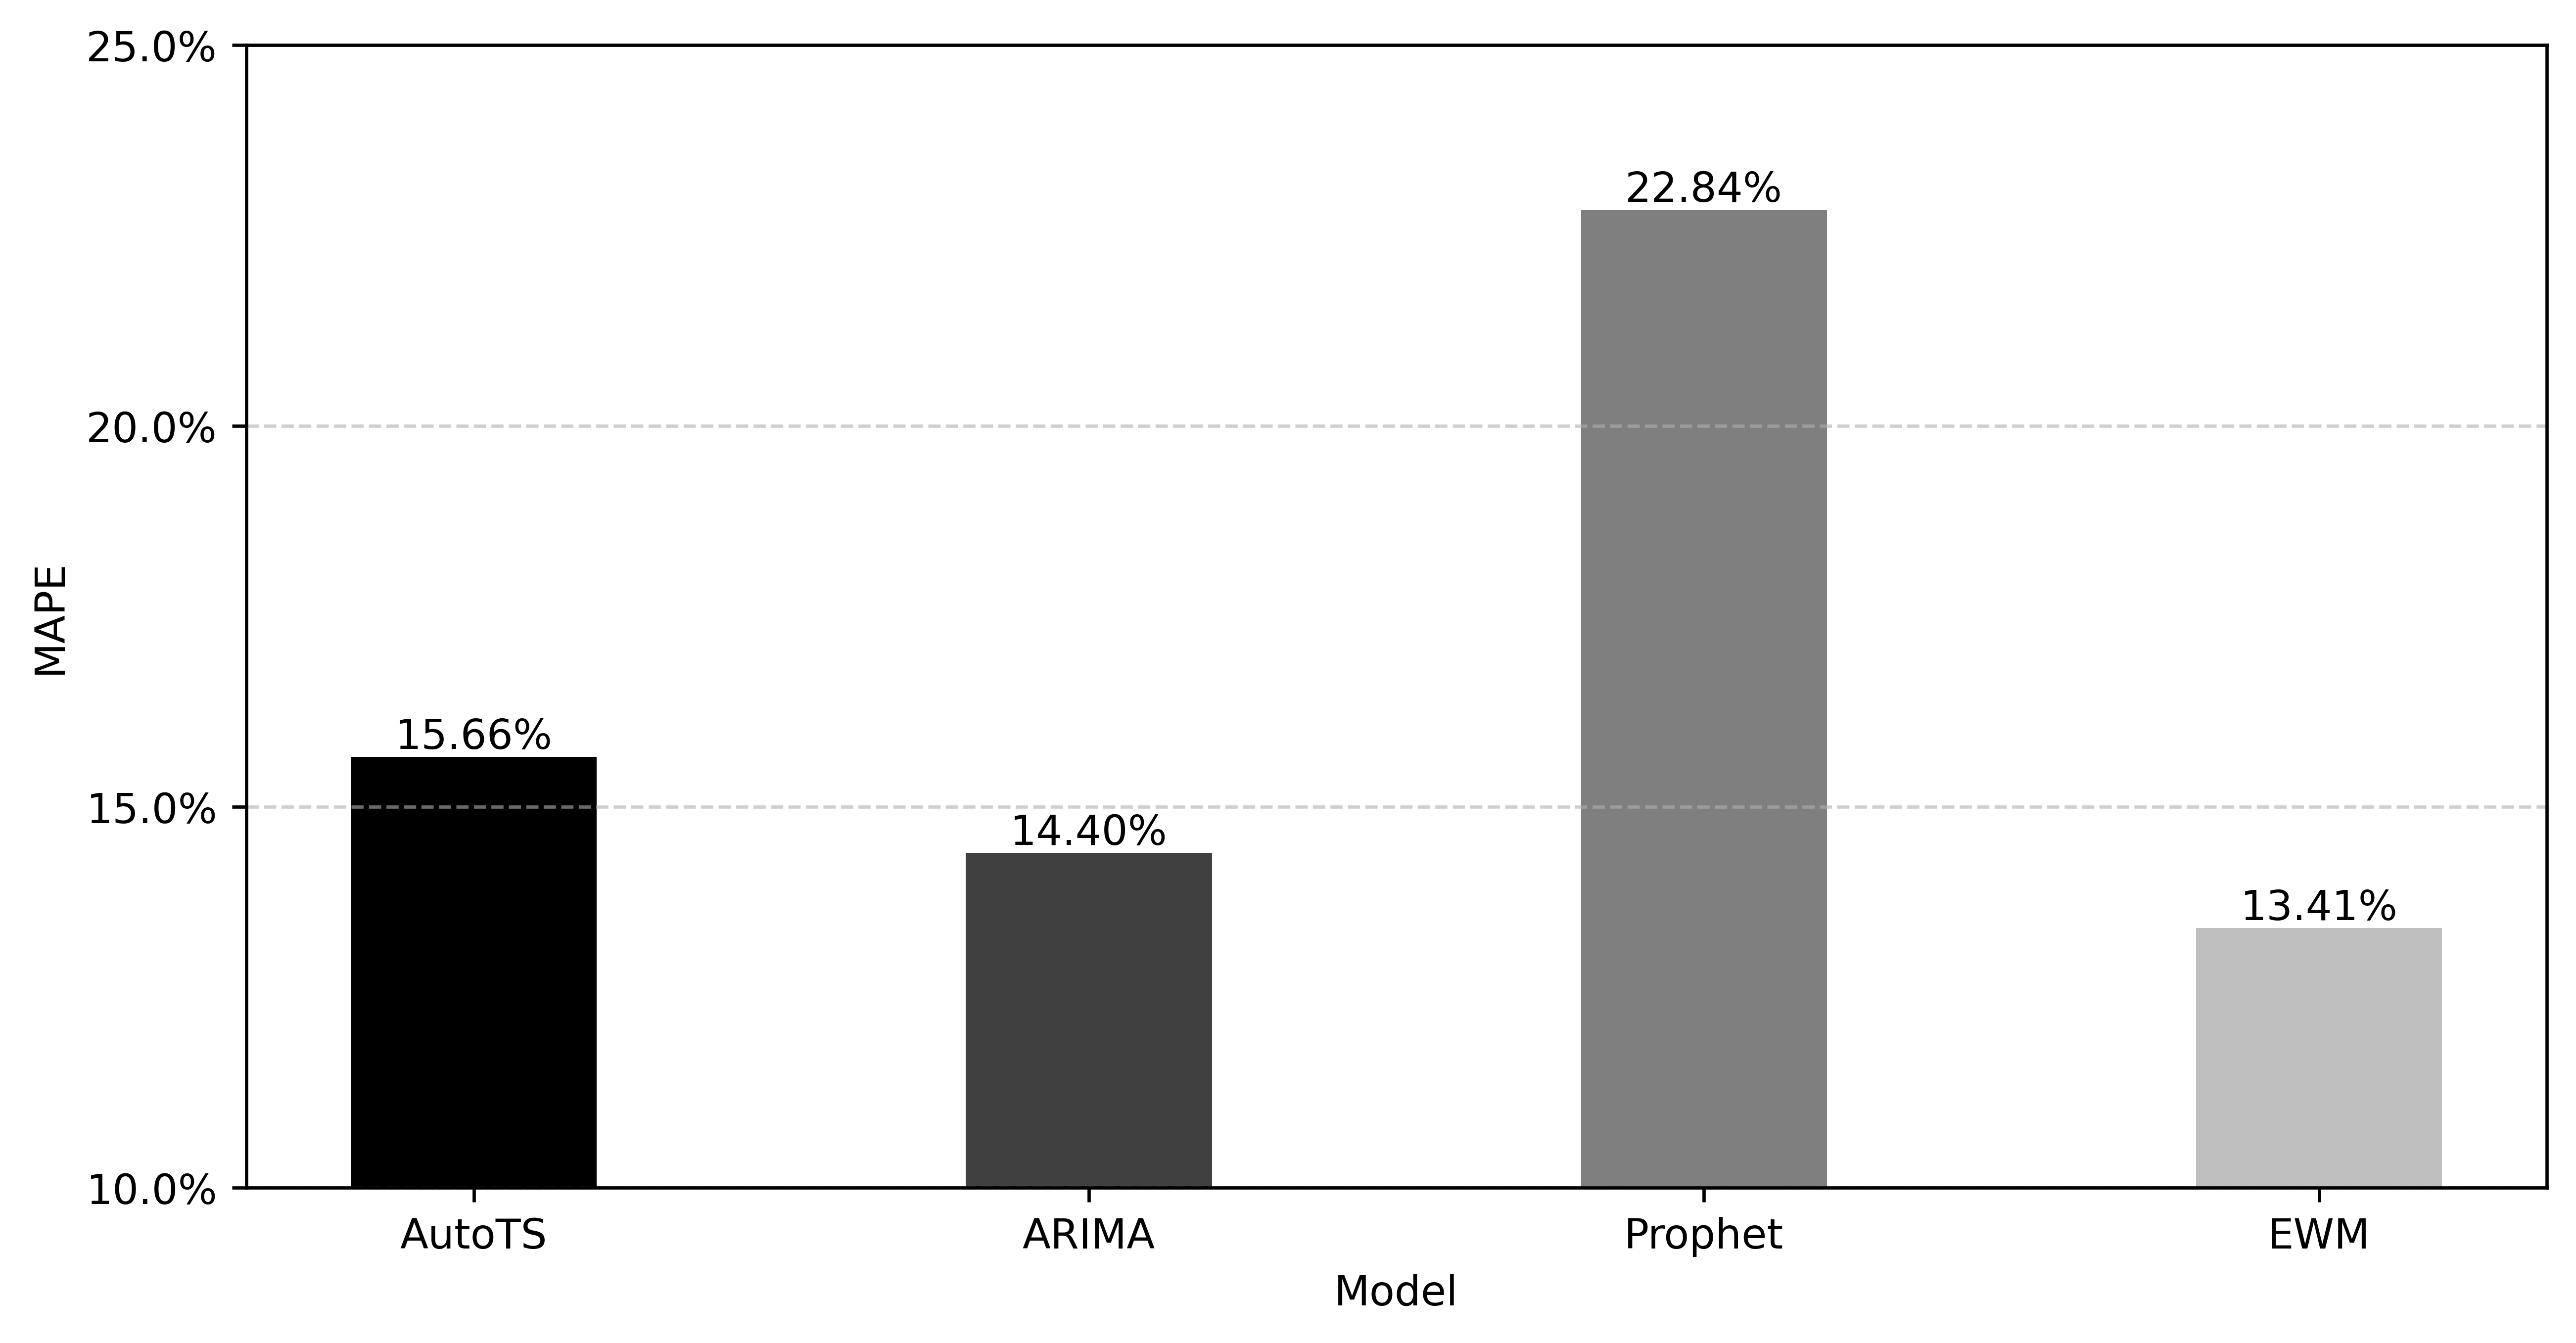

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdate


fig, ax = plt.subplots(figsize=(10, 5), dpi=600)

for i, (key, error) in enumerate(mape_errors.items()):
    ax.bar(key, error, width=0.4, color="black", alpha=1 - 0.25 * i)

    # annotate
    ax.text(key, error, f"{error:.2%}", ha="center", va="bottom")

ax.set_ylabel("MAPE")
ax.set_xlabel("Model")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_locator(mtick.MultipleLocator(0.05))

ax.xaxis.set_major_formatter(
    mtick.FixedFormatter(["AutoTS", "ARIMA", "Prophet", "EWM"])
)
ax.xaxis.set_major_locator(mtick.FixedLocator([0, 1, 2, 3]))


ax.set_ylim(0.1, 0.25)

ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.savefig("tests/data/mape.png", bbox_inches="tight", dpi=600)
plt.show()

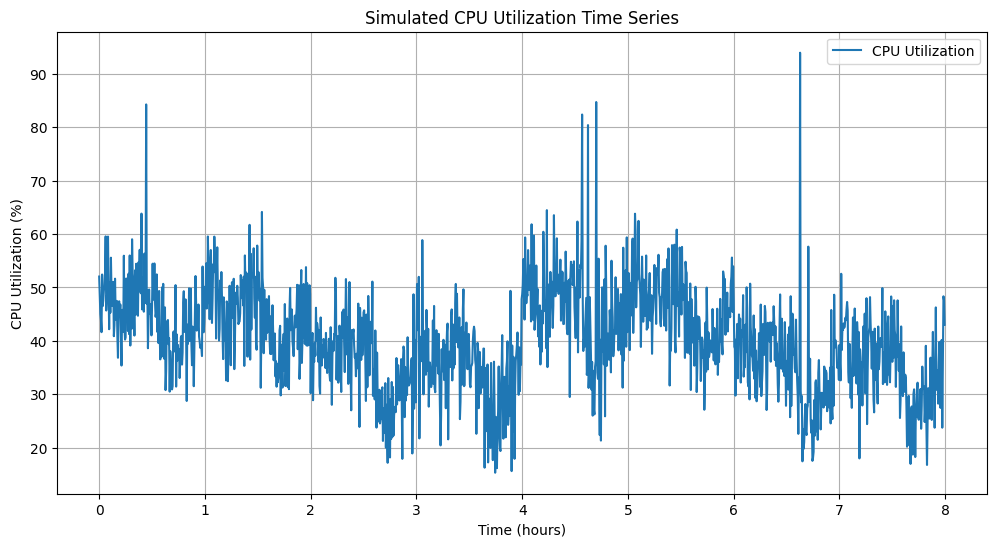

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# 设置基本参数
total_time = 8 * 60 * 60  # 8小时转为秒
time_step = 20  # 基本时间单位
n_steps = total_time // time_step  # 时间步数

# 生成时间序列
time_series = np.arange(0, total_time, time_step)

# 生成季节性成分
hourly_seasonality = np.sin(2 * np.pi * time_series / (60 * 60))
half_hourly_seasonality = np.cos(2 * np.pi * time_series / (30 * 60))
quarter_hourly_seasonality = np.sin(2 * np.pi * time_series / (15 * 60))

# 合成季节性成分
seasonality = (
    5 * hourly_seasonality
    + 3 * half_hourly_seasonality
    + 2 * quarter_hourly_seasonality
)

# 生成基础均值
mean_values = np.zeros(n_steps)
mean_values[: 2 * 60 * 60 // time_step] = 45
mean_values[2 * 60 * 60 // time_step : 4 * 60 * 60 // time_step] = 35
mean_values[4 * 60 * 60 // time_step : 6 * 60 * 60 // time_step] = 45
mean_values[6 * 60 * 60 // time_step :] = 35

# 生成基础方差
variance_values = np.zeros(n_steps)
variance_values[: 2 * 60 * 60 // time_step] = 32
variance_values[2 * 60 * 60 // time_step : 4 * 60 * 60 // time_step] = 36
variance_values[4 * 60 * 60 // time_step : 6 * 60 * 60 // time_step] = 33
variance_values[6 * 60 * 60 // time_step :] = 35

# 线性插值均值和方差
mean_values = np.interp(
    time_series, np.linspace(0, total_time, len(mean_values)), mean_values
)
variance_values = np.interp(
    time_series, np.linspace(0, total_time, len(variance_values)), variance_values
)

# 生成高斯噪声
noise = np.random.normal(0, 1, n_steps)

# 生成时间序列数据
cpu_utilization = mean_values + seasonality + noise * np.sqrt(variance_values)

# 添加异常点
n_outliers = int(0.01 * n_steps)
outliers_indices = np.random.choice(n_steps, n_outliers, replace=False)
cpu_utilization[outliers_indices] = np.random.uniform(20, 95, n_outliers)

# 限制数据范围在 [0, 100]
cpu_utilization = np.clip(cpu_utilization, 0, 100)

# 可视化时间序列数据
plt.figure(figsize=(12, 6))
plt.plot(time_series / 3600, cpu_utilization, label="CPU Utilization")
plt.xlabel("Time (hours)")
plt.ylabel("CPU Utilization (%)")
plt.title("Simulated CPU Utilization Time Series")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdate

fig, ax = plt.subplots(figsize=(20, 10), dpi=600)

ax.plot(test_df["ts"], test_df["%cpu"], label="Actual")
ax.plot(auto_ts_y.index, auto_ts_y["%cpu"], label="AutoTS", linestyle="--")
ax.plot(arima_y["ts"], arima_y["%cpu"], label="ARIMA", linestyle="--")
ax.plot(prophet_y["ts"], prophet_y["%cpu"], label="Prophet", linestyle="--")
ax.plot(ewm_y["ts"], ewm_y["%cpu"], label="EWM", linestyle="--")

ax.legend(
    loc="upper right",
    fontsize=16,
    ncols=5,
    fancybox=True,
    shadow=False,
)

ax.xaxis.set_major_formatter(mdate.DateFormatter("%H:%M:%S"))
ax.xaxis.set_major_locator(mdate.MinuteLocator(byminute=range(0, 60, 15)))

ax.set_xlabel("Time", fontsize=16)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("CPU Utilization", fontsize=16)

ax.grid(visible=True, which="both", linestyle="--", linewidth=1)

ax.tick_params(axis="both", which="major", labelsize=16)

plt.savefig("tests/data/cpu_utilization.png", bbox_inches="tight", dpi=600)
plt.show()

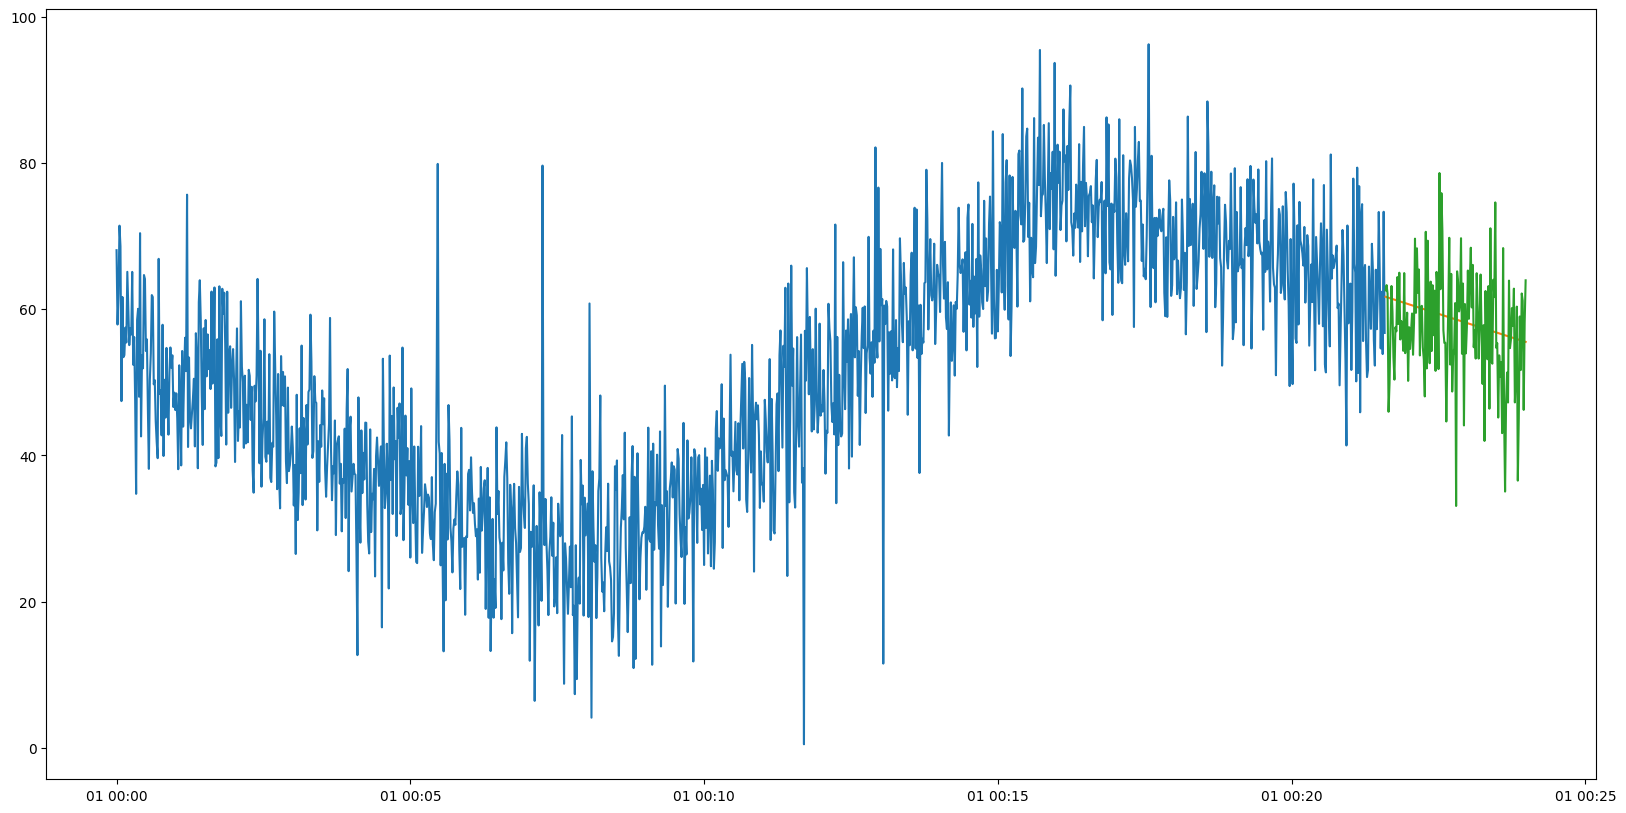

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(train_df["ts"], train_df["%cpu"])
plt.plot(y["ts"], y["%cpu"])
plt.plot(test_df["ts"], test_df["%cpu"])

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(df["timestamp"], df["cpu_clk_unhalted.distributed_lc0"])
plt.plot(y["timestamp"], y["cpi_lc0"])

KeyError: 'timestamp'